In [1]:
import os
from glob import glob
import dask
import xarray as xr
import xrft
import cartopy.crs as ccrs
from cmocean import cm
import numpy as np
from netCDF4 import Dataset
from scipy.io import loadmat

from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from dask_jobqueue import PBSCluster
local_dir = os.getenv('TMPDIR')
cluster = PBSCluster(local_directory=local_dir)

w = cluster.start_workers(10)

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  % (host, default, e), RuntimeWarning)


In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

<Client: scheduler='tcp://10.148.1.10:32850' processes=20 cores=80>

# 3. Save the whole data into one .zarr file

In [6]:
out_dir_zarr = '/home1/scratch/xyu/OSMOSIS_llc4320/zarr_file/'

In [7]:
ds_T = xr.open_zarr(out_dir_zarr+'Theta_total.zarr')
ds_S = xr.open_zarr(out_dir_zarr+'Salt_total.zarr')
ds_U = xr.open_zarr(out_dir_zarr+'U_total.zarr')
ds_V = xr.open_zarr(out_dir_zarr+'V_total.zarr')
ds_W = xr.open_zarr(out_dir_zarr+'W_total.zarr')

#print('\n data size: %.1f GB' %(ds.nbytes / 1e9))

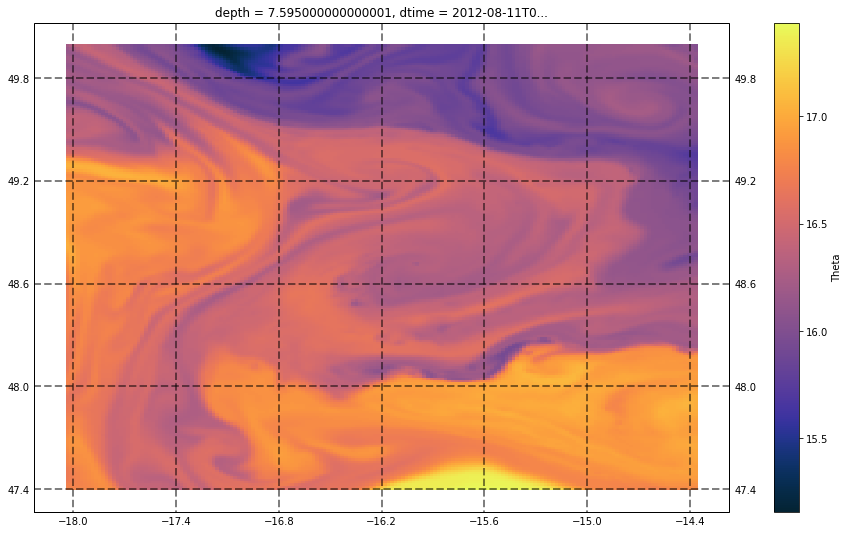

In [17]:
ds = ds_T['Theta'].isel(depth=5,time=8000) 

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds.plot.pcolormesh(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cm.thermal)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False

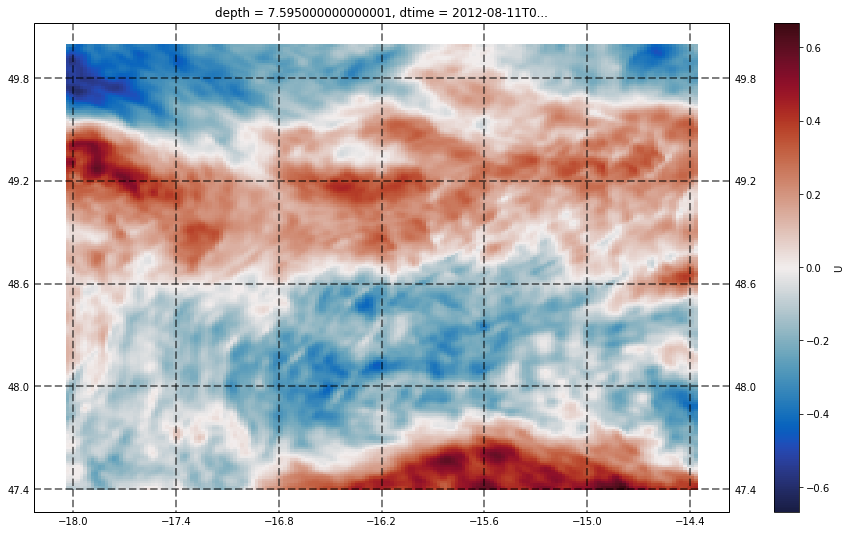

In [11]:
ds = ds_U['U'].isel(depth=5,time=8000) 

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds.plot.pcolormesh(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False

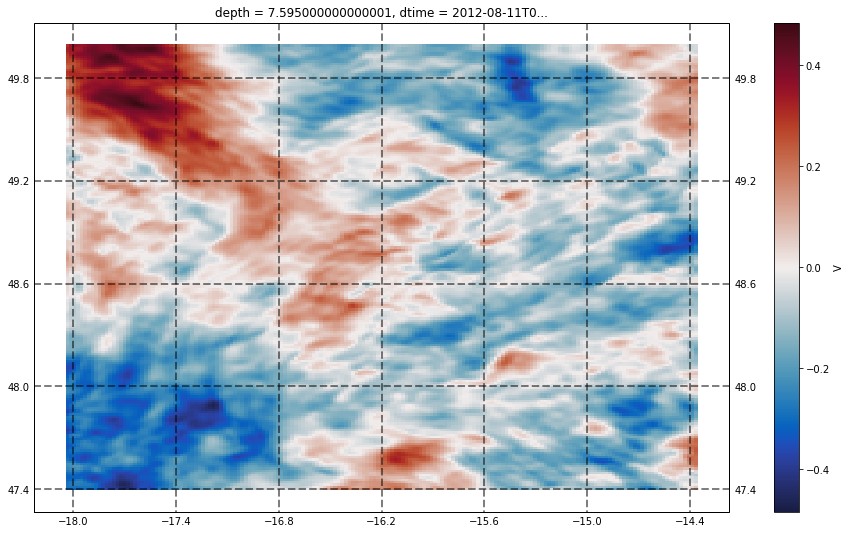

In [18]:
ds = ds_V['V'].isel(depth=5,time=8000) 

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds.plot.pcolormesh(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False

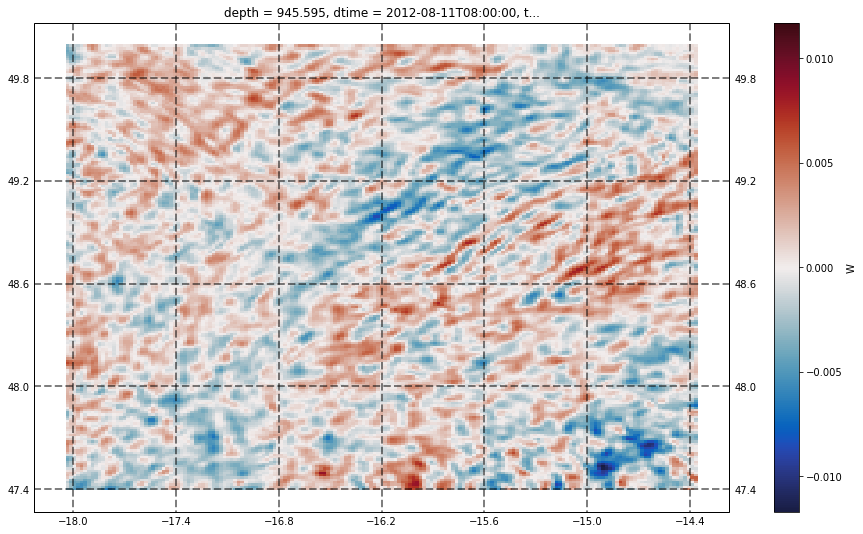

In [16]:
ds = ds_W['W'].isel(depth=50,time=8000) 

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ds.plot.pcolormesh(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cm.balance)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False

CPU times: user 55 s, sys: 4 s, total: 59 s
Wall time: 1min 19s


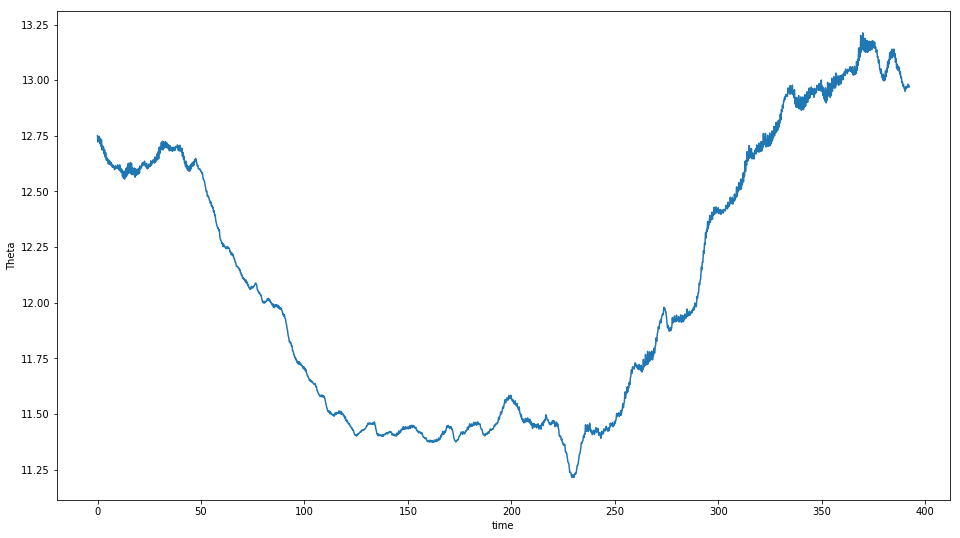

In [12]:
fig = plt.figure(figsize=(16,9))

%time ds_T['Theta'].isel(depth=slice(1,50), lat=slice(1,100), lon=slice(1,100)).mean(dim=['depth','lat','lon']).plot()

CPU times: user 57.9 s, sys: 3.69 s, total: 1min 1s
Wall time: 1min 28s


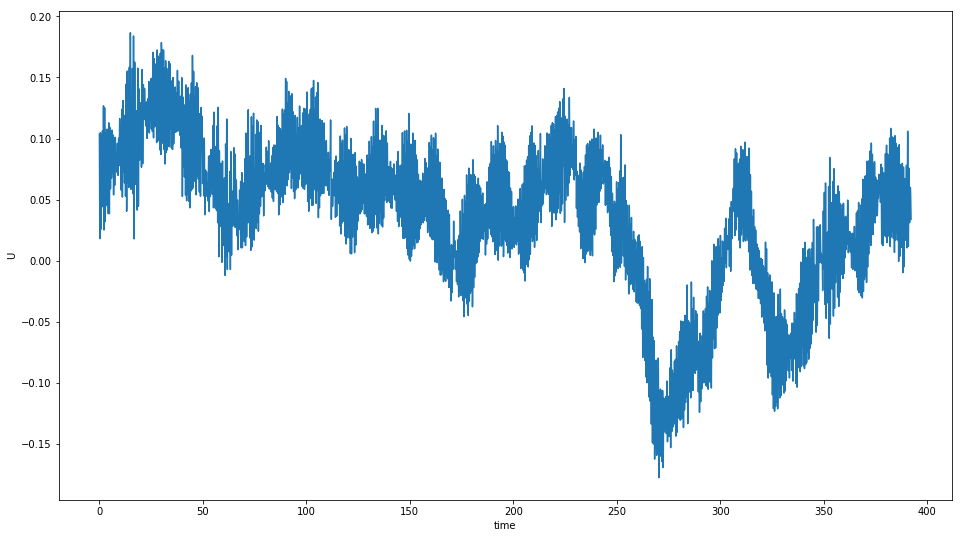

In [13]:
fig = plt.figure(figsize=(16,9))

%time ds_U['U'].isel(depth=slice(1,50), lat=slice(1,100), lon=slice(1,100)).mean(dim=['depth','lat','lon']).plot()

CPU times: user 57.6 s, sys: 3.62 s, total: 1min 1s
Wall time: 1min 26s


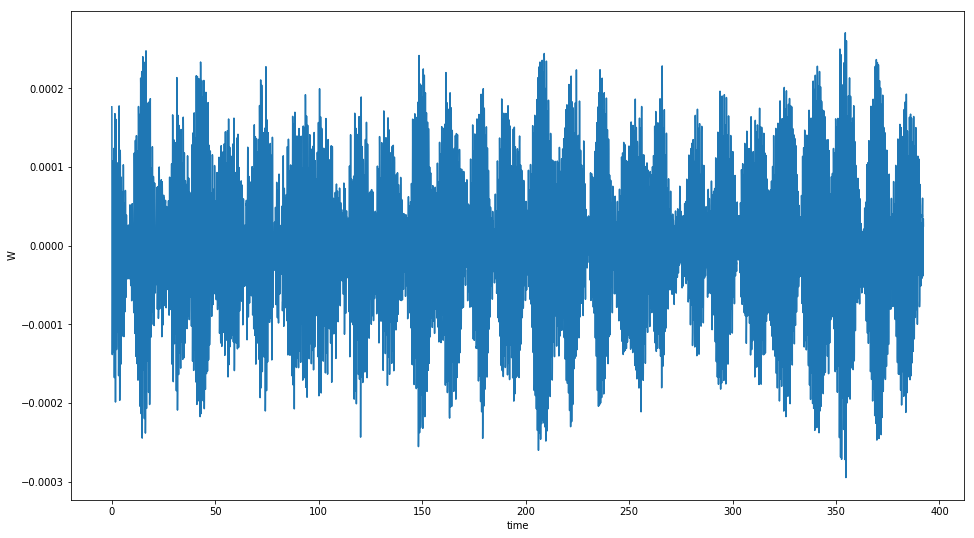

In [14]:
fig = plt.figure(figsize=(16,9))

%time ds_W['W'].isel(depth=slice(1,50), lat=slice(1,100), lon=slice(1,100)).mean(dim=['depth','lat','lon']).plot()

In [20]:
cluster.scheduler.close()

<Future finished result=None>